In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取视频
cap = cv2.VideoCapture(r"D:\work\python\clone\2d\ultralnew\ultralytics\dataset\vdio2.mp4")

# Shi-Tomasi角点检测参数
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Lucas-Kanade光流法参数
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# 随机颜色用于绘制
color = np.random.randint(0, 255, (100, 3))

# 读取第一帧
ret, old_frame = cap.read()
print(ret)
print(old_frame)

old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# 创建掩膜图像用于绘制
mask = np.zeros_like(old_frame)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 计算光流
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # 选择好的跟踪点
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # 绘制跟踪结果
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
        frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)
    
    img = cv2.add(frame, mask)

    cv2.imshow('frame', img)

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    # 更新旧帧和旧点
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cap.release()
cv2.destroyAllWindows()


True
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\video\src\lkpyramid.cpp:1260: error: (-215:Assertion failed) (npoints = prevPtsMat.checkVector(2, CV_32F, true)) >= 0 in function 'cv::`anonymous-namespace'::SparsePyrLKOpticalFlowImpl::calc'


Strain at frame 1: [0.0059902985, 0.0048119733, 0.0046878066, 0.0048663113, 0.005283496, 0.005471131, 0.0049918755, 0.0036755262, 0.00391585, 0.0059608016, 0.005679471, 0.0024369867, 0.0036047348, 0.00887899, 0.0053347764, 0.0035241605, 0.0050601, 0.0064819865, 0.0047691097, 0.0044421824, 0.0047229463, 0.0045928806, 0.0074155657, 0.0055796374, 0.005070025, 0.0054030023, 0.24132004, -0.25004882, 0.015617158, 0.005599708, 0.0056981468, 0.0056561287, 0.0072226203, 0.005347444, 0.0054090125, 0.004958395, 0.0048621865, 0.00961399, 0.006635612, 0.004657678, 0.004947744, 0.004957167, 0.005158286, 0.00529774, 0.0052350922, 0.005174148, 0.005418413, 0.0053323233, 0.005377088, 0.00594731, 0.005822753, 0.004924523, 0.0049617407, 0.004537218, 0.004623015, 0.0036740103, 0.005510139, 0.0073960815, 0.0048863487, 0.0056820023, 0.005489049, 0.004946262, -0.0022900016, 0.004933418, 0.005874813, 0.0053645065, 0.0056896633, 0.0054228813, 0.005465649, 0.0054612793]
Strain at frame 2: [0.012373643, 0.011275

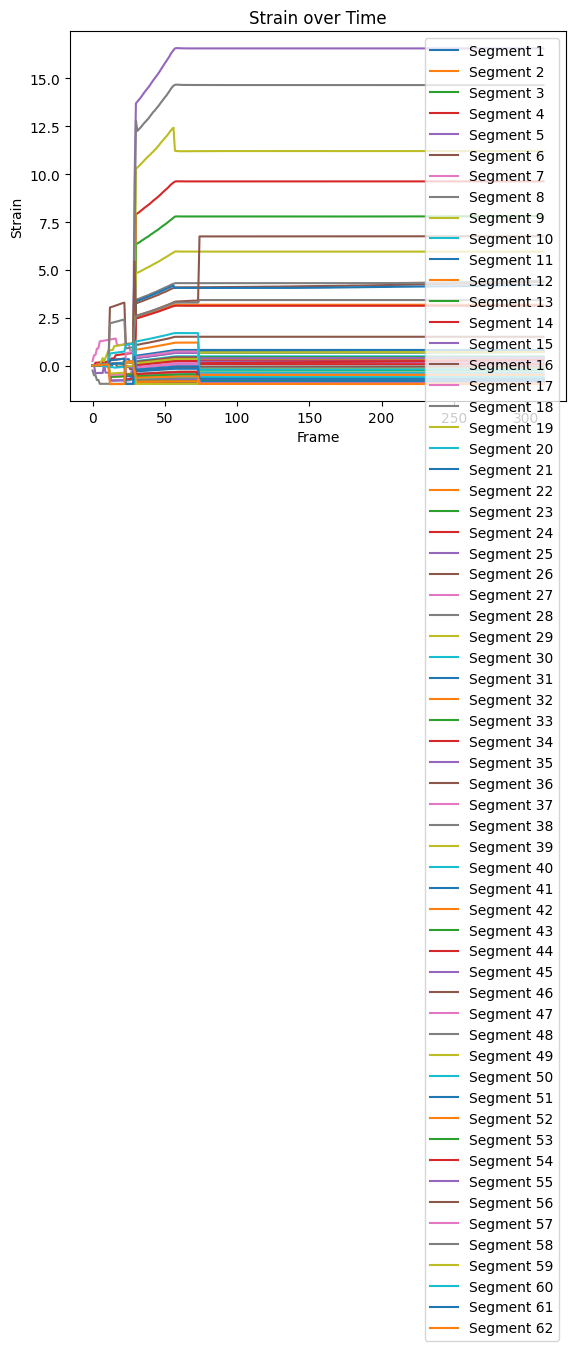

In [5]:
import cv2
import numpy as np

# 读取视频
cap = cv2.VideoCapture(r"D:\work\python\clone\2d\ultralnew\ultralytics\dataset\v1.mp4")

# Shi-Tomasi角点检测参数
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Lucas-Kanade光流法参数
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# 随机颜色用于绘制
color = np.random.randint(0, 255, (100, 3))

# 读取第一帧
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# 创建掩膜图像用于绘制
mask = np.zeros_like(old_frame)

# 初始化变量用于记录标记点距离变化
initial_distances = None
strain_data = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 计算光流
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # 选择好的跟踪点
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # 绘制跟踪结果
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a),int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame,(int(a),int(b)), 5, color[i].tolist(), -1)
    
    img = cv2.add(frame, mask)

    cv2.imshow('frame', img)

    # 计算并记录标记点之间的距离变化
    if initial_distances is None:
        initial_distances = []
        for i in range(len(good_new) - 1):
            dist = np.linalg.norm(good_new[i] - good_new[i + 1])
            initial_distances.append(dist)
    else:
        current_distances = []
        for i in range(len(good_new) - 1):
            dist = np.linalg.norm(good_new[i] - good_new[i + 1])
            current_distances.append(dist)
        strain = [(current - initial) / initial for current, initial in zip(current_distances, initial_distances)]
        strain_data.append(strain)
        print(f"Strain at frame {len(strain_data)}: {strain}")

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    # 更新旧帧和旧点
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cap.release()
cv2.destroyAllWindows()

# 结果分析和保存
import matplotlib.pyplot as plt

# 绘制各帧的应变变化曲线
for i, strain in enumerate(zip(*strain_data)):
    plt.plot(strain, label=f'Segment {i + 1}')
plt.xlabel('Frame')
plt.ylabel('Strain')
plt.title('Strain over Time')
plt.legend()
plt.show()


Strain at frame 1: [-0.00027663223, 0.00016098384, 6.423256e-05, -0.00045876336, -0.00017232215, -0.00037851976, -3.1250933e-05, -0.000117240066, 8.6769425e-05, 3.852597e-05, 0.0004074287, 0.0003935582, 0.0002171548, -0.0007469006, -0.0047130343, 4.9427494e-05, 0.00034224484, -8.28096e-05, 1.6093481e-05, 0.0002121689, 0.00019903584, -0.001066237, -0.009830588, 0.00017509356, -0.0003846849, 0.00013775597, 0.00040625376, 0.00013092389, 0.00035602326, -0.00019042654, 0.00046811256, -6.662877e-05, -0.00014554533, -0.003144804, -0.000114655006, -0.00095412135, -8.616966e-05, -0.0005124772, 0.0010609183, -0.0007631218, 0.00026016534, 9.088091e-05, 0.00013965143, 3.9375263e-06, 0.00039830516]
Strain at frame 2: [-2.3331177e-05, 0.00028374177, 0.00014135287, -0.0004225433, -5.774987e-05, 0.0006538069, 0.003885981, 7.954269e-05, 0.00021282533, -0.00016373537, 0.0010852548, 0.0003095762, 2.707191e-05, -3.862838e-05, 0.013169092, -0.00012068946, 0.0004564683, 0.00022543066, 0.0002707956, 0.000375

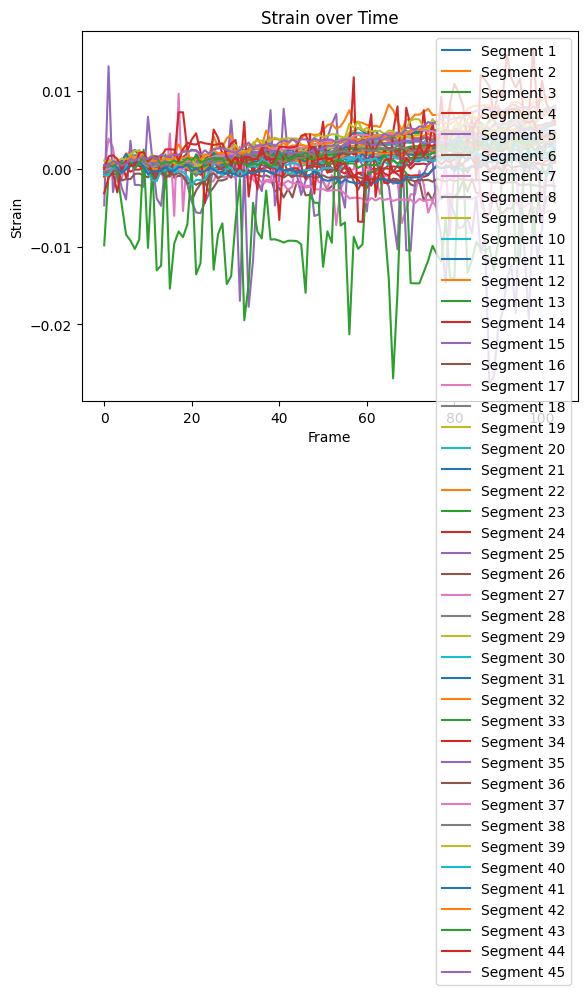

In [5]:
import cv2
import numpy as np

# 读取视频
cap = cv2.VideoCapture(r'D:\work\python\clone\2d\ultralnew\ultralytics\dataset\32mm coupler steel bar tensile strength testing.mp4')

# Shi-Tomasi角点检测参数
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Lucas-Kanade光流法参数
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# 随机颜色用于绘制
color = np.random.randint(0, 255, (100, 3))

# 读取第一帧
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# 创建掩膜图像用于绘制
mask = np.zeros_like(old_frame)

# 初始化变量用于记录标记点距离变化
initial_distances = None
strain_data = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 计算光流
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # 选择好的跟踪点
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # 绘制跟踪结果
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    
    img = cv2.add(frame, mask)

    cv2.imshow('frame', img)

    # 计算并记录标记点之间的距离变化
    if initial_distances is None:
        initial_distances = []
        for i in range(len(good_new) - 1):
            dist = np.linalg.norm(good_new[i] - good_new[i + 1])
            initial_distances.append(dist)
    else:
        current_distances = []
        for i in range(len(good_new) - 1):
            dist = np.linalg.norm(good_new[i] - good_new[i + 1])
            current_distances.append(dist)
        strain = [(current - initial) / initial for current, initial in zip(current_distances, initial_distances)]
        strain_data.append(strain)
        print(f"Strain at frame {len(strain_data)}: {strain}")

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    # 更新旧帧和旧点
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cap.release()
cv2.destroyAllWindows()

# 结果分析和保存
import matplotlib.pyplot as plt

# 绘制各帧的应变变化曲线
for i, strain in enumerate(zip(*strain_data)):
    plt.plot(strain, label=f'Segment {i + 1}')
plt.xlabel('Frame')
plt.ylabel('Strain')
plt.title('Strain over Time')
plt.legend()
plt.show()


Strain at frame 1: [-1.0, -0.9921347569882567, -0.9921955936369575, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9921955936369575]
Strain at frame 2: [-1.0, -0.9921347569882567, -0.9889629026751144, -1.0, -1.0, -1.0, -1.0, -0.9921347569882567, -0.9921955936369575]
Strain at frame 3: [-1.0, -0.9921347569882567, -0.9889629026751144, -1.0, -1.0, -1.0, -1.0, -0.9921347569882567, -0.9921955936369575]
Strain at frame 4: [-1.0, -0.9921347569882567, -0.9889629026751144, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9921955936369575]
Strain at frame 5: [-1.0, -0.9921347569882567, -0.9889629026751144, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9921955936369575]
Strain at frame 6: [-1.0, -0.9921347569882567, -0.9889629026751144, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9921955936369575]
Strain at frame 7: [-1.0, -0.9921347569882567, -0.9889629026751144, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9921955936369575]
Strain at frame 8: [-1.0, -0.9921347569882567, -0.9889629026751144, -1.0, -1.0, -1.0, -1.0, -1.0, -0.9921955936369575]
Strain at frame 9:

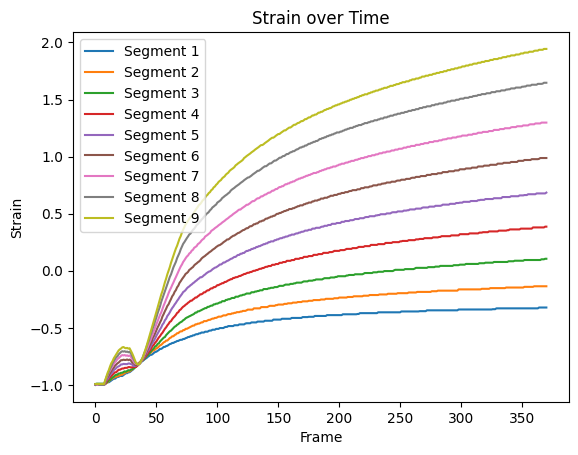

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取视频
cap = cv2.VideoCapture(r"D:\work\python\clone\2d\ultralnew\ultralytics\dataset\v1.mp4")

# Shi-Tomasi角点检测参数
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

# Lucas-Kanade光流法参数
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# 随机颜色用于绘制
color = np.random.randint(0, 255, (100, 3))

# 读取第一帧
ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# 创建掩膜图像用于绘制
mask = np.zeros_like(old_frame)

# 初始化变量用于记录标记点距离变化
initial_distances = None
strain_data = []

# 用于拟合钢筋轴线的点集
points_for_line_fit = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 计算光流
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    # 选择好的跟踪点
    good_new = p1[st == 1]
    good_old = p0[st == 1]

    # 绘制跟踪结果并收集用于拟合的点
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
        points_for_line_fit.append([a, b])
    
    img = cv2.add(frame, mask)

    # 拟合钢筋轴线
    if len(points_for_line_fit) >= 2:
        [vx, vy, x, y] = cv2.fitLine(np.array(points_for_line_fit, dtype=np.float32), cv2.DIST_L2, 0, 0.01, 0.01)
        lefty = int((-x * vy / vx) + y)
        righty = int(((frame.shape[1] - x) * vy / vx) + y)
        img = cv2.line(img, (frame.shape[1] - 1, righty), (0, lefty), (0, 255, 0), 2)

    # 放置并跟踪虚拟标距点
    num_markers = 10
    if initial_distances is None:
        # 在轴线上均匀放置标距点
        initial_distances = []
        markers = []
        for i in range(num_markers):
            marker_x = int(x + i * vx * (frame.shape[1] / num_markers))
            marker_y = int(y + i * vy * (frame.shape[1] / num_markers))
            markers.append((marker_x, marker_y))
            if i > 0:
                dist = np.linalg.norm(np.array(markers[i]) - np.array(markers[i - 1]))
                initial_distances.append(dist)
            img = cv2.circle(img, (marker_x, marker_y), 5, (0, 0, 255), -1)
    else:
        current_distances = []
        for i in range(len(markers) - 1):
            marker_x = int(x + i * vx * (frame.shape[1] / num_markers))
            marker_y = int(y + i * vy * (frame.shape[1] / num_markers))
            current_distances.append(np.linalg.norm([marker_x - markers[i][0], marker_y - markers[i][1]]))
            img = cv2.circle(img, (marker_x, marker_y), 5, (0, 0, 255), -1)
        strain = [(current - initial) / initial for current, initial in zip(current_distances, initial_distances)]
        strain_data.append(strain)
        print(f"Strain at frame {len(strain_data)}: {strain}")

    cv2.imshow('frame', img)

    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    # 更新旧帧和旧点
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

cap.release()
cv2.destroyAllWindows()

# 结果分析和保存
# 绘制各帧的应变变化曲线
for i, strain in enumerate(zip(*strain_data)):
    plt.plot(strain, label=f'Segment {i + 1}')
plt.xlabel('Frame')
plt.ylabel('Strain')
plt.title('Strain over Time')
plt.legend()
plt.show()


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def read_video(video_path):
    """
    读取视频文件。

    参数:
        video_path (str): 视频文件路径。

    返回:
        cap (cv2.VideoCapture): 视频捕获对象。
    """
    return cv2.VideoCapture(video_path)

def detect_initial_features(frame_gray, feature_params):
    """
    在初始帧中检测特征点。

    参数:
        frame_gray (numpy.ndarray): 灰度图像。
        feature_params (dict): Shi-Tomasi角点检测参数。

    返回:
        p0 (numpy.ndarray): 检测到的特征点。
    """
    return cv2.goodFeaturesToTrack(frame_gray, mask=None, **feature_params)

def track_features(old_gray, frame_gray, p0, lk_params):
    """
    在新帧中跟踪特征点。

    参数:
        old_gray (numpy.ndarray): 上一帧的灰度图像。
        frame_gray (numpy.ndarray): 当前帧的灰度图像。
        p0 (numpy.ndarray): 上一帧的特征点。
        lk_params (dict): Lucas-Kanade光流法参数。

    返回:
        p1 (numpy.ndarray): 当前帧的特征点。
        st (numpy.ndarray): 状态向量，表示每个特征点的跟踪状态。
    """
    p1, st, _ = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    return p1, st

def draw_tracking(frame, good_old, good_new, color):
    """
    绘制特征点的跟踪结果。

    参数:
        frame (numpy.ndarray): 当前帧图像。
        good_old (numpy.ndarray): 上一帧的特征点。
        good_new (numpy.ndarray): 当前帧的特征点。
        color (numpy.ndarray): 颜色数组。

    返回:
        frame (numpy.ndarray): 绘制了跟踪结果的图像。
        mask (numpy.ndarray): 掩膜图像。
    """
    mask = np.zeros_like(frame)
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    return frame, mask

def fit_line(points):
    """
    拟合钢筋轴线。

    参数:
        points (list): 用于拟合的点集。

    返回:
        line_params (tuple): 拟合线的参数。
    """
    [vx, vy, x, y] = cv2.fitLine(np.array(points, dtype=np.float32), cv2.DIST_L2, 0, 0.01, 0.01)
    return vx, vy, x, y

def draw_fitted_line(frame, vx, vy, x, y):
    """
    在图像上绘制拟合的钢筋轴线。

    参数:
        frame (numpy.ndarray): 当前帧图像。
        vx (float): 线条的x方向向量。
        vy (float): 线条的y方向向量。
        x (float): 线条上的点的x坐标。
        y (float): 线条上的点的y坐标。

    返回:
        frame (numpy.ndarray): 绘制了轴线的图像。
    """
    lefty = int((-x * vy / vx) + y)
    righty = int(((frame.shape[1] - x) * vy / vx) + y)
    frame = cv2.line(frame, (frame.shape[1] - 1, righty), (0, lefty), (0, 255, 0), 2)
    return frame

def place_and_track_markers(num_markers, frame, vx, vy, x, y, initial_distances, markers):
    """
    放置并跟踪虚拟标距点。

    参数:
        num_markers (int): 标距点的数量。
        frame (numpy.ndarray): 当前帧图像。
        vx (float): 线条的x方向向量。
        vy (float): 线条的y方向向量。
        x (float): 线条上的点的x坐标。
        y (float): 线条上的点的y坐标。
        initial_distances (list): 初始标距点的距离。
        markers (list): 标距点的坐标。

    返回:
        frame (numpy.ndarray): 绘制了标距点的图像。
        initial_distances (list): 更新后的初始距离。
        current_distances (list): 当前标距点的距离。
    """
    current_distances = []
    for i in range(num_markers):
        marker_x = int(x + i * vx * (frame.shape[1] / num_markers))
        marker_y = int(y + i * vy * (frame.shape[1] / num_markers))
        if initial_distances is None:
            markers.append((marker_x, marker_y))
            if i > 0:
                dist = np.linalg.norm(np.array(markers[i]) - np.array(markers[i - 1]))
                initial_distances.append(dist)
        else:
            current_distances.append(np.linalg.norm([marker_x - markers[i][0], marker_y - markers[i][1]]))
        frame = cv2.circle(frame, (marker_x, marker_y), 5, (0, 0, 255), -1)
    return frame, initial_distances, current_distances

def calculate_strain(current_distances, initial_distances):
    """
    计算应变。

    参数:
        current_distances (list): 当前标距点的距离。
        initial_distances (list): 初始标距点的距离。

    返回:
        strain (list): 应变值。
    """
    strain = [(current - initial) / initial for current, initial in zip(current_distances, initial_distances)]
    return strain

def plot_strain(strain_data):
    """
    绘制应变变化曲线。

    参数:
        strain_data (list): 各帧的应变数据。
    """
    for i, strain in enumerate(zip(*strain_data)):
        plt.plot(strain, label=f'Segment {i + 1}')
    plt.xlabel('Frame')
    plt.ylabel('Strain')
    plt.title('Strain over Time')
    plt.legend()
    plt.show()

def main(video_path):
    """
    主函数，执行视频处理流程。

    参数:
        video_path (str): 视频文件路径。
    """
    # 读取视频
    cap = read_video(video_path)

    # Shi-Tomasi角点检测参数
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

    # Lucas-Kanade光流法参数
    lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

    # 随机颜色用于绘制
    color = np.random.randint(0, 255, (100, 3))

    # 读取第一帧
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = detect_initial_features(old_gray, feature_params)

    # 创建掩膜图像用于绘制
    mask = np.zeros_like(old_frame)

    # 初始化变量用于记录标记点距离变化
    initial_distances = []
    strain_data = []

    # 用于拟合钢筋轴线的点集
    points_for_line_fit = []
    markers = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # 计算光流
        p1, st = track_features(old_gray, frame_gray, p0, lk_params)

        # 选择好的跟踪点
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # 绘制跟踪结果并收集用于拟合的点
        frame, mask = draw_tracking(frame, good_old, good_new, color)
        points_for_line_fit.extend(good_new)

        # 拟合钢筋轴线
        if len(points_for_line_fit) >= 2:
            vx, vy, x, y = fit_line(points_for_line_fit)
            frame = draw_fitted_line(frame, vx, vy, x, y)

            # 放置并跟踪虚拟标距点
            frame, initial_distances, current_distances = place_and_track_markers(10, frame, vx, vy, x, y, initial_distances, markers)

            if current_distances:
                strain = calculate_strain(current_distances, initial_distances)
                strain_data.append(strain)
                print(f"Strain at frame {len(strain_data)}: {strain}")

        cv2.imshow('frame', frame)

        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

        # 更新旧帧和旧点
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)

    cap.release()
    cv2.destroyAllWindows()

    # 绘制应变变化曲线
    plot_strain(strain_data)

# 调用主函数
if __name__ == "__main__":
    video_path = r'D:\work\python\clone\2d\ultralnew\ultralytics\dataset\v1.mp4'  # 这里填写你的视频文件路径
    main(video_path)


IndexError: list index out of range